# Harmonic Oscillator

* **Author:**

* **Date:**

* **Time spent on this assignment:**

Our goal in this assignment is to look at and think about the simple Harmonic oscillator.  

In [1]:

import numpy as np
import scipy
import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy.polynomial.hermite as Herm
import math
import scipy.optimize


import matplotlib.animation as animation
from IPython.display import HTML
def resetMe(keepList=[]):
    ll=%who_ls
    keepList=keepList+['FuncAnimation','Herm','HTML','resetMe','scipy','np','plt','math','jax','jnp','jit','grad','HTML','animation','animateMe_singlePendula']
    for iiii in keepList:
        if iiii in ll:
            ll.remove(iiii)
    for iiii in ll:
        jjjj="^"+iiii+"$"
        %reset_selective -f {jjjj}
    ll=%who_ls
    plt.rcParams.update({"font.size": 14})
    return
resetMe()
import datetime;datetime.datetime.now()

datetime.datetime(2025, 11, 18, 18, 51, 47, 826082)

In this assignment, we will consistently use grids and observables that we will set up in this way. This is very similar to how you set things for the particle in the box assignment.

In [2]:
def SetupGrid(L,delta_x):
    n=int(round(L/delta_x))+1
    xs=np.linspace(-L/2,L/2,n,endpoint=True)
    return xs


def SetupObservables(xs,delta_x):
    X=np.diag(xs)
    P=(np.diag([-1.j/(2*delta_x) for i in range(len(xs)-1)],k=1)+np.diag([1.j/(2*delta_x) for i in range(len(xs)-1)],k=-1))

    P2=np.zeros_like(P)
    for i in range(len(xs)):
        P2[i,i]=2.0/delta_x**2
        if i+1<len(xs):
            P2[i,i+1]=-1.0/delta_x**2
            P2[i+1,i]=-1.0/delta_x**2
    return X,P,P2


def update(frame, skip, xs, positions=None, potential=[], max_value=0, energy=0,scale=0):
    plt.cla()  # Clear the current plot
    if type(positions)==np.ndarray:
        pass
    plt.plot(xs, np.abs(arrays[::skip][frame])**2)  # Plot the current array
    plt.ylim(0, 1.5*max_value)  # Set the y-axis limit
    plt.xlabel('x')
    plt.ylabel('Value')
    plt.title(f'Frame {skip*frame+1}/{len(arrays)}')  # Display the frame number





## Exercise 1.  The Uncertainty Principle

In this exercise, we'd like to think about the uncertainty principle.

### a. The Fourier Basis

The uncertainty principle tells us that you can't simultaneously know a particle's position and momentum.  It's typically quantified as

$$ \Delta X \Delta P > \frac{1}{2} $$

Let's think for a moment about what it means to be certain or uncertain about a particles position.  If you are uncertain about the position of a particle, what this means is that if you measure that particle many times, you get very different answers for the $x$ position of a particle.   If you are certain about the position of a particle this means that most measurements come out concentrated in a particular region so even before measuring, we could feel reasonably certain where the particle is in $x$.   

Here is an example of a wave-function which you are reasonably certain about it's position:

$$
\Psi = N \exp[-\alpha (x-4)^6]
$$

where $N$ is the normalization and $\alpha=100$.  

After setting up your grid and observables:
```
delta_x=0.1
xs=SetupGrid(20,delta_x)
X,P,P2=SetupObservables(xs,delta_x)
```
go ahead and plot the probability (absolute value squared of the wave-function) of getting different $x$ values for this wave-function rememembering to label the x-axis as `plt.xlabel("x")` and the y-axis as `plt.ylabel("probability density")`.   From this plot, you should be able to see that if you measure $x$ over and over again if will always be getting an answer somewhat around 4.



<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

Text(0, 0.5, 'probability density')

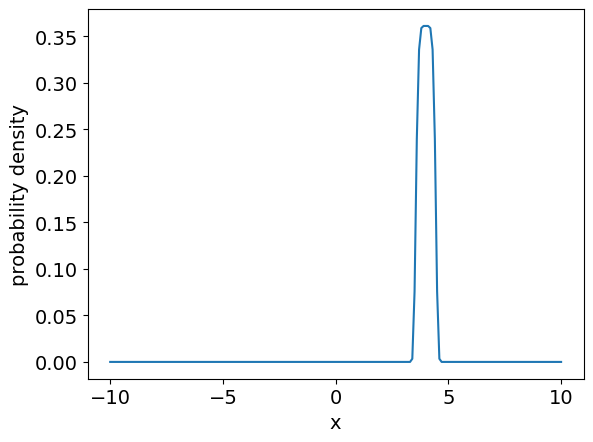

In [38]:
###ANSWER HERE
delta_x=0.1
L = 20
xs=SetupGrid(20,delta_x)
X,P,P2=SetupObservables(xs,delta_x)
alpha = 100
psi = np.exp(-alpha*(xs - 4)**6)
normsq = psi.conjugate() @ psi
psi = psi / np.sqrt(normsq)
probpsi = abs(psi)**2
plt.plot(xs,psi)
plt.xlabel("x")
plt.ylabel("probability density")

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

We are now hoping that there's also a pretty narrow range of where the particle can be in momentum $P$ - i.e. if we measure the momentum over and over again would we get essentially the same value.  It's hard to look at our plot and figure this out at the moment.  That's because the wave-function is currently plotted in the x-basis.  We could also plot it in the momentum basis.  If we did that, then we could look at the wave-function squared and see how spread out it is in momentum (and so whether we would expect to get the same momentum if we measured it).  

So we'd like to replot the wave-function as a function of $p$ and not $x$.  Mind you, this is the same wave-function.  It's just a different way of representing it.  If I show you a curve and I don't tell label the axis so you know whether you are in the $x$ basis or $p$ basis, you don't really know what you're looking at.

To change a basis you mutiply by a unitary matrix that corresponds to that basis change.  We need the unitary matrix that multiplies a wave-function in the x-basis and converts it to the p-basis.  Then we can plot it in the p-basis.
 You can get this unitary (along with the basis of p-points) by doing

```
def MomentumBasis(L,delta_x):
    N=int(round(L/delta_x))+1
    ns=np.array(range(0,N))
    xs=np.linspace(-L/2,L/2,N,endpoint=True)
    ks=np.array(ns*2*np.pi)/(N*delta_x)
    U=1.0/np.sqrt(N)*np.exp(-1.j*np.outer(xs,ks))    
    return ks,U
```

Now by getting out this unitary (`ps,U=MomentumBasis(20,0.1)`) you can then apply `U@psi` to rotate into the fourier basis.  Take the wave-function in real space and rotate it into the fourer basis. Plot the wave-function squared in the momentum basis and see if (after measurement) in the momentum basis you are likely to get consistent answers for the momentum.  

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

Text(0, 0.5, 'probability density')

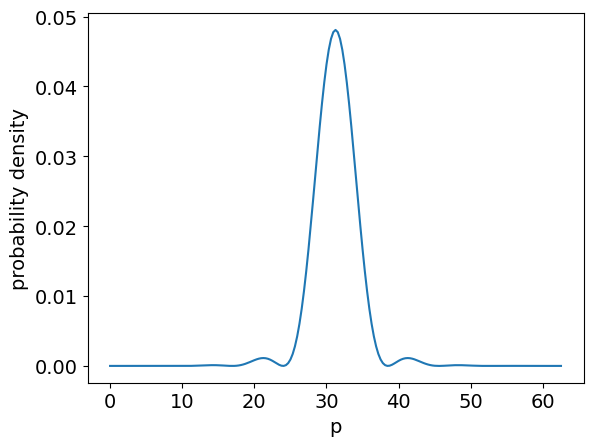

In [39]:
###ANSWER HERE
def MomentumBasis(L,delta_x):
    N=int(round(L/delta_x))+1
    ns=np.array(range(0,N))
    xs=np.linspace(-L/2,L/2,N,endpoint=True)
    ks=np.array(ns*2*np.pi)/(N*delta_x)
    U=1.0/np.sqrt(N)*np.exp(-1.j*np.outer(xs,ks))
    return ks,U

ps,U= MomentumBasis(20,0.1)
psip = U@psi
probpsip = abs(psip)**2
plt.plot(ps,probpsip)
plt.xlabel("p")
plt.ylabel("probability density")

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

While our position resolution is good, our momentum resolution is not that great - it seems we can locate the momentum to within 5'sh.  

### b. Measuring Uncertainty

To get a better handle on this, we want to be able to quantify the uncertainty.   The measure of certainty essentially needs to be a measure of the spread of the wave-function which can be quantified by the variance of the wavefunction in the position or momentum basis - i.e.

* $\Delta X = \sqrt{\langle X^2 \rangle - \langle X \rangle^2}$
* $\Delta P = \sqrt{\langle P^2 \rangle - \langle P \rangle^2}$

Recall that you can get the expectation value of an observable $O$ by doing `psi.conjugate() @ O @ psi.T`

Write a function `def uncertainty(psi,X,P)` which returns the $\Delta X$ and $\Delta P$ and $\Delta X \Delta P$.     

Now compute the uncertainty for the wave-functions above. You should quantify what we say above.  The variance of the position is smallish but the variance of the momentum is much larger and so if we measured we would be getting widely different momentum.  

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [40]:
###ANSWER HERE
def uncertainty(psi, X,P):
  expx2 = psi.conjugate() @ X**2 @ psi.T
  expx = psi.conjugate() @ X @ psi.T
  # print("expx2:\n",expx2)
  # print("expx**2:\n",expx**2)
  # print("expx2 - expx**2:\n",expx2 - expx**2)
  sigmax = np.sqrt(np.abs(expx2 - expx**2))
  # print("sigmax:\n",sigmax)
  # ps,U= MomentumBasis(20,0.1)
  # psip = U@psi
  expp2 = psi.conjugate() @ P**2 @ psi.T
  expp = psi.conjugate() @ P @ psi.T
  sigmap = np.sqrt(np.abs(expp2 - expp**2))
  return sigmax, sigmap, sigmax*sigmap
sigmax, sigmap, xpvar = uncertainty(psi, X, P)
print("\nin the position basis:")
print("sigmax:\n",sigmax)
print("sigmap:\n",sigmap)
print("deltaxdeltap:\n",xpvar)


in the position basis:
sigmax:
 0.23331078991742396
sigmap:
 6.92141501844677
deltaxdeltap:
 1.6148408053001375


<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

Our wave-function does have a tuning paramater $\alpha$ that will make it more or less concentrated in $x$ (for example try $\alpha=0.0001$ in the x-basis). Write some code to tune $\alpha$ from $10$ down to $0.0001$.  On the same plot, show as a function of $\alpha$
* the value of $\Delta X$
* the value of $\Delta P$
* the value of $\Delta X \Delta P$

What is the minimum value of $\Delta X \Delta P$ you can find.   The uncertainty principle tells us that $\Delta X \Delta P >0.5$.  What's the closest you get?  

(you may find it useful here to work on a logarithmic grid of alpha - i.e.  
```
alphas=np.arange(0.0001,10.01,0.01)
alphas=np.exp(np.arange(-10,10,1.0))
```

If you do this, then you are going to want to change the x-axis on a log-scale as `plt.xscale('log')`

Plot also the theoretical minima `plt.ahline(0.5)`


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

0.75025308221145


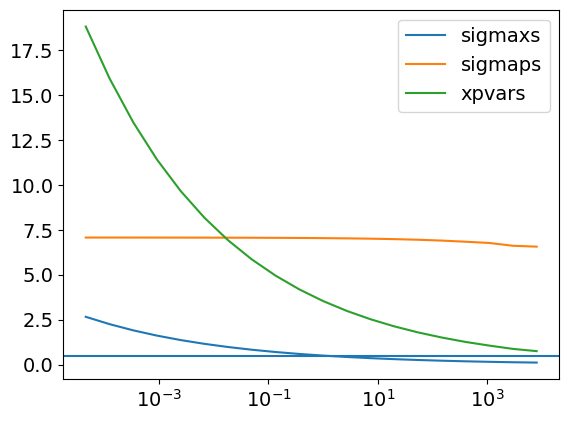

In [72]:
###ANSWER HERE
alpha = 100
# alphas = np.arange(.0001,10.01,.01)
alphas = np.exp(np.arange(-10,10,1.0))
sigmaxs = []
sigmaps = []
xpvars = []
for i in alphas:
  psi = np.exp(-i*(xs - 4)**6)
  normsq = psi.conjugate() @ psi
  psi = psi / np.sqrt(normsq)
  sigmax, sigmap, xpvar = uncertainty(psi, X, P)
  sigmaxs.append(sigmax)
  sigmaps.append(sigmap)
  xpvars.append(xpvar)
plt.plot(alphas,sigmaxs, label="sigmaxs")
plt.plot(alphas,sigmaps,label="sigmaps")
plt.plot(alphas,xpvars,label="xpvars")
plt.axhline(.5)
plt.legend()
plt.xscale('log')
print(min(xpvars))



<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### c. Minimizing Uncertainty

So far we've been having trouble finding something that is compact both in real space and in momentum space.  In particular, we haven't found a wave-function that matches the Heisenberg limit.  In this section, we are going to try to optimize for the minimum uncertainty.  (*you want to do this section with a grid spacing of `dx=0.1`*).

We will perform this optimization using python's `scipy.optimize`.  To do this, we need to write an objective function `def f(psi)` that takes the wave-function `psi` and returns the thing we want to minimize.

You could do this by calling your `uncertainty` function and just returning $\Delta X \Delta P$.  It will be useful to add to our objective function a small penalty for cases where either $\Delta X$ or $\Delta P$ are very large (we want to avoid this because we want to know $x$ and $p$ both pretty well and this helps the optimization because there is a subtle issue with our discretization as $\Delta  X \rightarrow 0$ and $\Delta P$ gets very large).  

Therefore, use an objective function $\Delta X \Delta P + 0.01 \textrm{max}(\Delta X, \Delta P)$.  Make sure your three delta are all real.

Now we can call the optimization function.  The optimization function needs to be sent out objective function and a guess - i.e. `ans=scipy.optimize.minimize(f,guess)`.  You can use as your guess $\sin(0.3141592653589793 x)$ which you can check is not very localized.


Once the optimizations is done, the new wave-function is `ans.x`.  Check the uncertainty of your new wave-function and plot it both in the x-basis and the p-basis.   You may notice that your wave-function looks gaussian. You can double check this by trying to fit/plot a gaussian on top of it.



<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [83]:
###ANSWER HERE
def f(psi):
  # npsi = psi / np.linalg.norm(psi)
  psi = psi.view(np.complex128)
  normsq = psi.conjugate() @ psi
  npsi = psi / np.sqrt(normsq)
  sigmax, sigmap, xpvar = uncertainty(npsi, X, P)
  return np.real(xpvar) + .01*max(np.real(sigmax),np.real(sigmap))
dx = .1
guess = np.sin(.3141592653589793 *xs)
print(guess.shape)
ans = scipy.optimize.minimize(f,guess.view(float))
print(dx)
optnormsq = ans.x.conjugate() @ ans.x
optpsi = ans.x / np.sqrt(optnormsq)
optsigmax, optsigmap, optxpvar = uncertainty(optpsi,X,P)
print(optsigmax)
print(optsigmap)
print(optxpvar)
proboptpsi = abs(optpsi)**2
plt.plot(xs,proboptpsi)
# change basis
ps,U= MomentumBasis(20,0.1)
optpsip = U@optpsi
propoptpsip = abs(optpsip)**2
# plt.plot(ps,propoptpsip)


[-1.22464680e-16  0.00000000e+00 -3.14107591e-02  0.00000000e+00
 -6.27905195e-02  0.00000000e+00 -9.41083133e-02  0.00000000e+00
 -1.25333234e-01  0.00000000e+00 -1.56434465e-01  0.00000000e+00
 -1.87381315e-01  0.00000000e+00 -2.18143241e-01  0.00000000e+00
 -2.48689887e-01  0.00000000e+00 -2.78991106e-01  0.00000000e+00
 -3.09016994e-01  0.00000000e+00 -3.38737920e-01  0.00000000e+00
 -3.68124553e-01  0.00000000e+00 -3.97147891e-01  0.00000000e+00
 -4.25779292e-01  0.00000000e+00 -4.53990500e-01  0.00000000e+00
 -4.81753674e-01  0.00000000e+00 -5.09041416e-01  0.00000000e+00
 -5.35826795e-01  0.00000000e+00 -5.62083378e-01  0.00000000e+00
 -5.87785252e-01  0.00000000e+00 -6.12907054e-01  0.00000000e+00
 -6.37423990e-01  0.00000000e+00 -6.61311865e-01  0.00000000e+00
 -6.84547106e-01  0.00000000e+00 -7.07106781e-01  0.00000000e+00
 -7.28968627e-01  0.00000000e+00 -7.50111070e-01  0.00000000e+00
 -7.70513243e-01  0.00000000e+00 -7.90155012e-01  0.00000000e+00
 -8.09016994e-01  0.00000

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 201 is different from 402)

In [ ]:
###ANSWER HERE

In [ ]:
###ANSWER HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### d. Coherent States

There is a special wave-function that we will consider later called a coherent state.

The wave-function for coherent states are

$$\Psi(x)=e^{-\frac{1}{2}(x-\alpha\sqrt{2})^2}$$
We will set $\alpha=0.2$ for this part of the problem.


Using your code, compute the uncertainty $\Delta X$ and $\Delta P$ and $\Delta$ for this (actually will be true for any) coherent state?

Also plot the probability in real and momentum space.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
###ANSWER HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### e.  Not coherent states

So far we've seen examples of states which satiate the uncertainty bound while simultaneously having the same uncertainty in $x$ and $p$.  Verify that this state satiates the Heisenberg uncertainty bound while having different values of $\Delta X$ and $\Delta P$

$$\Psi(x) =  N \exp[-0.3 x^2]$$
where $N$ is the normalization.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
###ANSWER HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (start)"></img><br></div>

## Exercise 2. Harmonic Oscillator in Real Space

The Hamiltonian for the simple harmonic oscillator is

$$
H=\frac{\hat{P}^2}{2m} + \frac{1}{2}m\omega^2 \hat{X}^2
$$

We know that $\hat{P}=-i\hbar \frac{\partial}{\partial x}$ leaving us with

$$
H=-\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + \frac{1}{2}m\omega^2 x^2
$$

Working in units where $\hbar=1$ and selecting $m=\omega=1$ we are then left with

$$
H=-\frac{1}{2}\frac{\partial^2}{\partial x^2} + \frac{1}{2}x^2
$$

### a. Hamiltonian and Eigenvalues

Let's start by generating the matrix for this Hamiltonian.  We are again going to use $-10 \leq x \leq 10$ via
```
delta_x=0.01
xs=SetupGrid(20,delta_x)
X,P,P2=SetupObservables(xs,delta_x)
```

To generate the Hamiltonian
* The Kinetic piece is as it was in the particle in the box
* The Potential piece is diagonal with $V(x)=1/2 x^2$ down the diagonal.

Plotting the first 10 eigenenergies.  You should start trying to make your plots pretty and informative:
* It's often useful to set up the size of the plot by doing `fig,ax=plt.subplots(1,1,figsize=(5, 4),constrained_layout=True)`
* Include in your plots reasonable markers and sizes `marker='o',markersize=10,linestyle='--'`
* Turn on a grid (`ax.grid()`)
* Make the grid have a reasonable step `ax.yaxis.set_major_locator(plt.MultipleLocator(1))`
* Label your axes! (`ax.set_xlabel(...)`)
* Set your limits to something sane (`ax.set_ylim(0,something)`)


What important qualitative feature do you notice about the energy levels?

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
###ANSWER HERE

In [ ]:
###ANSWER HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### b.  Eigenstates

Now we want to plot the lowest three eigenstates. You should add labels to your states: in each of your plot commands do
- `ax.plot(x,y,label="Eigenstate ...")`
and then include the legend with
- `ax.legend()`

Notice how many nodes (zeros) the n'th eigenstate has.

In class, you learned that the expected solution to the Harmonic Oscillator involves Hermite polynomials.  In particular, the n'th eigenstate should be

$$
\Psi_n(x)= \frac{1}{\sqrt{2^n n!}}\left(\frac{m\omega}{\pi \hbar} \right)^{1/4} e^{-\frac{m\omega x^2}{2\hbar}}H_n\left(\sqrt{\frac{m\omega}{\hbar}}x\right)
$$

where $H_n$ are the Hermite polynomials.

In python to get the Hermite polynomials, use
```
Herm.hermval(xi, herm_coeffs)
```
where $xi=\sqrt{m\omega/\hbar}$ and the `herm_coefs` need to be a numpy array of size n+1 with a 1 in spot $n$ and 0 otherwise.

* Plot the expected answers on top of your generated answers.  You should find that they fall on top of each other.

You may occassionally find that the expected and numerical answer are upside down from each other. This is because the global phase of a wave-function doesn't matter.  This means you can always multiply a wave-function by -1 and it's still physically the same. If you find this is happening to you, go ahead and multipy appropriately by -1 to fix it.

* In addition, print out the uncertainty of these wave-functions.  Are they anywhere near the Heisenberg limit.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
###ANSWER HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### c. Dynamics and Ehrenfest theorem

Like we did in the particle in the box, we are going to do some dynamics.

It's worth encapsulating your time-evolution into two functions (*if you've done the particle-in-a-finite-well assignment you may have already written these functions*)

* `TimeEvolutionOperator(H,delta_t)` should take the Hamiltonian and your time step and return $e^{-iH\delta t}$.   It's important to note that for each Hamiltonian, you only need to compute this time-evolution operator once even if you are time-evolving for many steps (or even many different initial wave-functions). This will save significant time compared to computing it each time!


* `TimeEvolution(psi,M,steps)` which takes the initial wave-function `psi`, the time-evolution operator `M` and the number of steps and returns a list of arrays that include the snapshot of the wave-function at every time step.

We also want to do an update of the update function so that the animation is slightly more informative. *Note: If you did the particle-in-a-finite-well assignment you may have already done these modifications*
In particular, we are going to want to plot some information about the potential and energy of our state.  Because our y-axis is currently probability (which is at most 1), we will need to rescale the energy (which can get large) so that everything sanely fits on the same axis. To do this, we are going to rescale all our energies by `scale=max_value/energy` where `max_value` is the largest probability your wave-function gets (which we've already been calculating for animation) and `energy` is the energy of our initial wave-function, which you can compute (recall the energy doesn't change as a function of time).

**Modifications of the Update Function**
* Add a line which takes the `energy` and `max_value` sent to it and computes a scale
* Plots a red-dashed line at the energy of our state - i.e. `plt.axhline(energy*scale,color='red',linestyle='--')`
* Plots the potential (scaled by the scale)
* Gives`def update(frame, skip, xs, positions, potential, max_value, energy)`  the relevant additional parameters.  To do this you will need to compute the positions using your `X` from `SetupObservables` (outside the function)



Let's start with the wave-function
* `psi=(np.sqrt(0.1)*v[:,0]+np.sqrt(0.25)*v[:,1]+1.j*np.sqrt(0.65)*v[:,2]).astype(np.complex128)` where `v` are the eigenstates from the SHO.  

Perform time-evolution with the initial wave-function with a
* $\delta t=0.1$ and
* for a total time of $T=40$.  

Store the snapshot of the wave-function at each time and animate it.



<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
###ANSWER HERE

In [ ]:
###ANSWER HERE

In [ ]:
###ANSWER HERE

In [ ]:
###ANSWER HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

As in the particle in the box, takes your list of wave-functions as a function of time and generate from each wave-function a value of $\langle x \rangle(t)$ and $\langle p \rangle(t)$ showing (on the subplots as typical)

On the same plot show
* $\langle x \rangle(t)$
* $\langle p \rangle(t)$
* $\partial \langle x \rangle(t)/\partial t$

What do you notice about the second two plots?

We are also going to add one more subplot this time:  `ax=plt.subplots(3,1)[1]`

For our third subplot what we'd like to plot is

* $\frac{\partial \langle p(t) \rangle }{\partial t}$ generated by finite differences or `np.gradient` using your momentum curve above

* -$\langle V'(x) \rangle(t)$   This is the average of the derivative of the potential over the wave-function.  Take the derivative of the potential by hand and then think about what observable you need to get this.  

You should find these latter two bullet points are on top of each other.


This (and the previous plots) are a validation of Ehrenfest Theorem which tells us

$$ m \frac{d}{dt}\langle x \rangle = \langle p \rangle$$

and

$$ \frac{d}{dt} \langle p \rangle = -\langle V'(x)\rangle $$

Finally go ahead and make a phase plot of momentum vs position.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
###ANSWER HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### d. Coherent States

We now wish to run time dynamics on a coherent state. Recall the coherent state (as above) is

$$\Psi(x) = \frac{1}{N} e^{-\frac{1}{2}(x-\alpha\sqrt{2})^2}$$
where $N$ normalizes the wave-function.  We will use $\alpha =3$

Do time-dynamics on this system generating both the animation as well as the other plots above.

Add one more line to your plots: the position and velocity of a classical oscillator in the same Harmonic potential starting at $x=3\sqrt{2}$

What do you notice that's interesting about the time-evolution of the coherent states.

Does something not quite look right in your animation?


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
###ANSWER HERE

In [ ]:
###ANSWER HERE

In [ ]:
###ANSWER HERE

In [ ]:
###ANSWER HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

## Exercise 3. Raising and Lowering Operators

### a. Raising and Lowering Operators

With the Harmonic oscillator, we've learned that it is useful to look at raising and lowering operators.  

$$a=\sqrt{\frac{m\omega}{2\hbar}}\left(\hat{X}+\frac{i}{mw}\hat{P}\right)$$

$$a^\dagger=\sqrt{\frac{m\omega}{2\hbar}}\left(\hat{X}-\frac{i}{mw}\hat{P}\right)$$

Build both $a^\dagger$ and $a$ in the real space basis.  

* Verify that the operators are complex conjugates of each other (by daggering a and subtracting $a^\dagger$ and making sure they are zero  - i.e. check that the maximum of the absolute value of the difference is zero)

* Look at the matshow of the upper left of the matrix `plt.matshow(a[0:10,0:10])`.  Can you understand why this is what this looks like.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
###ANSWER HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### b. Testing the raising of the raising operator



We expect that the raising operator has the property that when it acts on an eigenstate $|n-1\rangle$ it should produce the eigenstate $\sqrt{n}$ times eigenstate $|n\rangle$.  Let's check that by plotting.  Plot $\sqrt{4}  |\Psi_4 \rangle$ and $a^\dagger |\Psi_3\rangle$ and verify that they give the same result.   Again be cognizant that you might need to flip one of the states.

Similarly let's check that $a$ lowers a state.  Verify that eigenstate 4 is the same as eigenstate 5 lowered with a coefficient of $\sqrt{5}$.

Also verify that the lowering operator destroys the ground state - i.e. check that $a^\dagger \Psi_0$ is actually zero. (Remember to check the scale of your graph as it might have some features but essentially be zero)


<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
###ANSWER HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### c. Verifying the norms and number operators

Now we would like to further verify that the raising and lowering operators always act with the additional $\sqrt{N}$ term.  Since our eigenstates start normalized, if we compute the norm (`np.linalg.norm`) of the eigenstates after they've been hit by the raising and lowering operators you should find that their norm is $\sqrt{N}$.  Verify this by
* plotting the norm of the eigenstates (separately for the raising and lower operator) hitting the first ten eigenstates
* plotting $\sqrt{N}$

and checking that they are the same

We can also check that $a^\dagger a$ is a number operator.  Plot again for the first ten eigenstates, the expectation value  of $a^\dagger a$ in those eigenstates.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
###ANSWER HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### d.  Write it in the basis of number operators

 Now we would like to go ahead and write $a^\dagger$ and $a$ in the Harmonic Oscillator basis.  In this basis, what we expect to see is that both the raising and lowering operators are just above and below the diagonal respectively. To rotate an operator from the position basis into the Harmonic oscillator basis, you want to do ` v.T.conjugate() @ O @ v` for an operator `O` where `v` is the eigenstates of the simple harmonic oscillator.  Go ahead and rotate $a$, $a^\dagger$ and $a^\dagger a$ into the Harmonic oscillator basis and look at the top $10 \times 10$ chunk. Does it make sense?  What are the values of the diagonal of $a^\dagger a$

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
###ANSWER HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

### e. Warts

So far everything has worked out well when we discretized things.  In this section, we just mention a couple warts that you need to look out for.

* The simplest thing is just that the eigenstates and eigenvalues start diverging from the true answer due to the finite L and discretization. This is very standard but you can see this here by plotting the eigenstates out to $n=100$.  What do you notice? To fix this, you can go ahead and increase $L=40$ and see that the eigenstates out to $n=100$ look fine.  

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
###ANSWER HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

We learned in quantum mechanics that $x$ and $p$ obey canonical commutation relations - i.e. $[X,P]=i\hbar$ (which means explicitly it's the identity matrix times $i\hbar$).  

Let's test this.  Take the $X$ and $P$ operators and compute their commutator. Do a matshow of the imaginary part of the top $10 \times 10$ piece of the matrix.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
###ANSWER HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>

You may notice that you get something that is not diagonal at all.  Instead their is $i\hbar$ right off the diagonal. What's going on!?  

Remember that the rows and columns are labelled by $x$.  This means that what we expected was

$$\langle x|[\hat{X},\hat{P}]|x\rangle= i\hbar$$

But what we got was the piece that was just off the diagonal having $i\hbar$ on it - i.e. you found that

$$\langle x|[\hat{X},\hat{P}]|x + \Delta x \rangle =\langle x + \Delta x |[\hat{X},\hat{P}]|x  \rangle =  i\hbar$$

This is very close especially since you could take $\Delta x$ to be very very tiny. So we almost got the right thing.  

What went wrong?

When you actually have finite matrices the trace of a commutator always has to be zero:  

$$Tr(XP-PX)=Tr(XP)-Tr(PX)=Tr(XP)-Tr(XP)=0$$

where the matrices in the trace got flipped because the trace is invariant with respect to cycling matrices.  So it's just impossible to have $i\hbar$ down the diagonal.  That said, given the closeness it doesn't cause us much trouble.  

* Finally, we have learned that

$$
H = \frac{1}{2} + \hbar \omega a a^\dagger
$$

is the Harmonic Oscillator Hamiltonian.

Go ahead and diagonalize this in the x-basis and plot the first 100 eigenvalues.  

You'll notice a set of eigenvalues that you are used to (which can correspond to the eigenvectors you are used to) and an erroneous set of eigenvalues.  This is essentially coming from the fact that `P@P` and `P2` are different matrices.  You might think that this is some technical issue but it's actually deep and fundamental and causes all sorts of trouble in lattice gauge theory. It goes by the name Fermion doubling and you can see a description of the problem (and the piece that's very relevant here) is you look at this [Wikipedia article](https://en.wikipedia.org/wiki/Fermion_doubling) and look at the section on derivative discretization.

<div><img src="https://clark.physics.illinois.edu/246img/AnsStart.svg" width=200 align=left alt="Answer (start)"></img><br></div>

In [ ]:
###ANSWER HERE

In [ ]:
###ANSWER HERE

<div><img src="https://clark.physics.illinois.edu/246img/AnsEnd.svg" width=200 align=left alt="Answer (end)"></img><br></div>